# Analyse des données automobiles


In [2]:
%pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)
  Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
     --------------------------------------- 41.3/41.3 MB 12.1 MB/s eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importations + Nettoyage des données

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('voitures.csv')
df['Année'] = pd.to_datetime(df['Année'], format='%m-%Y', errors='coerce')
df['Annee_Only'] = df['Année'].dt.year
df['KM'] = pd.to_numeric(df['KM'].astype(str).str.replace(r'\D', '', regex=True))
df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce')


# Analyse univariée

In [4]:
df.describe(include='all')


,Marque,Modèle,Année,Boîte,KM,Énergie,Code Postal,Département,Prix,Annee_Only
count,400,400,399,400,400.000000,400,400.000000,400.000000,400.000000,399.000000
unique,40,192,NaN,4,NaN,7,NaN,NaN,NaN,NaN
top,Peugeot,3008,NaN,Boîte manuelle,NaN,d,NaN,NaN,NaN,NaN
freq,64,13,NaN,225,NaN,212,NaN,NaN,NaN,NaN
mean,NaN,NaN,2015-04-23 10:13:32.030075136,NaN,119517.340000,NaN,59456.082500,59.110000,15947.132500,2014.867168
min,NaN,NaN,1990-10-01 00:00:00,NaN,0.000000,NaN,3110.000000,3.000000,990.000000,1990.000000
25%,NaN,NaN,2012-03-01 00:00:00,NaN,73100.000000,NaN,41352.500000,41.250000,6990.000000,2012.000000
50%,NaN,NaN,2016-02-01 00:00:00,NaN,119143.500000,NaN,63300.000000,63.000000,10990.000000,2016.000000
75%,NaN,NaN,2019-02-15 00:00:00,NaN,158701.000000,NaN,78310.000000,78.000000,15871.250000,2019.000000
max,NaN,NaN,2025-05-01 00:00:00,NaN,345000.000000,NaN,98000.000000,98.000000,595000.000000,2025.000000


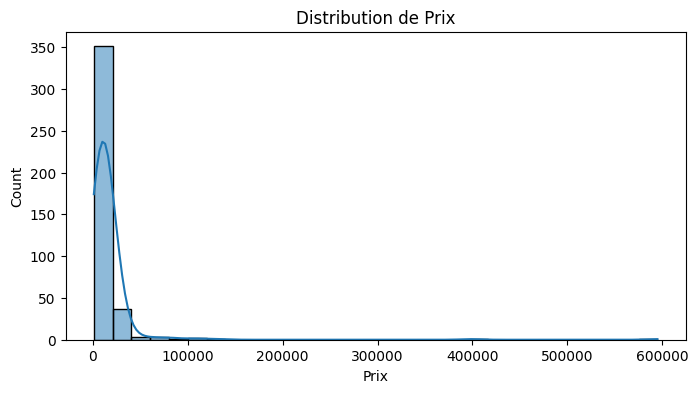

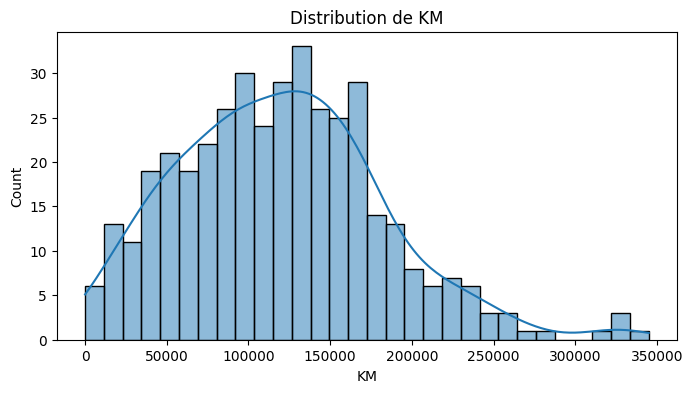

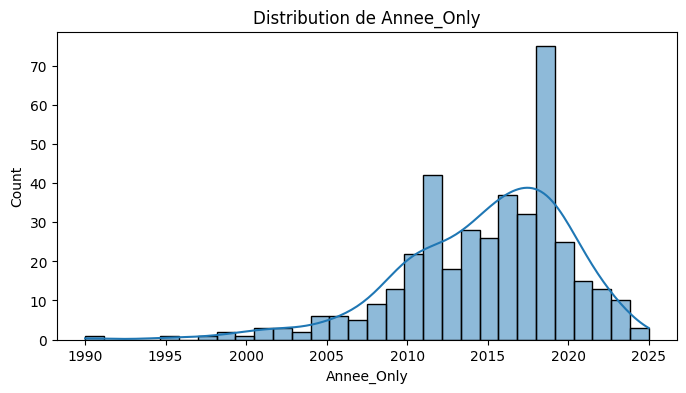

In [5]:
for col in ['Prix', 'KM', 'Annee_Only']:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution de {col}')
    plt.show()


# Analyse bivariée

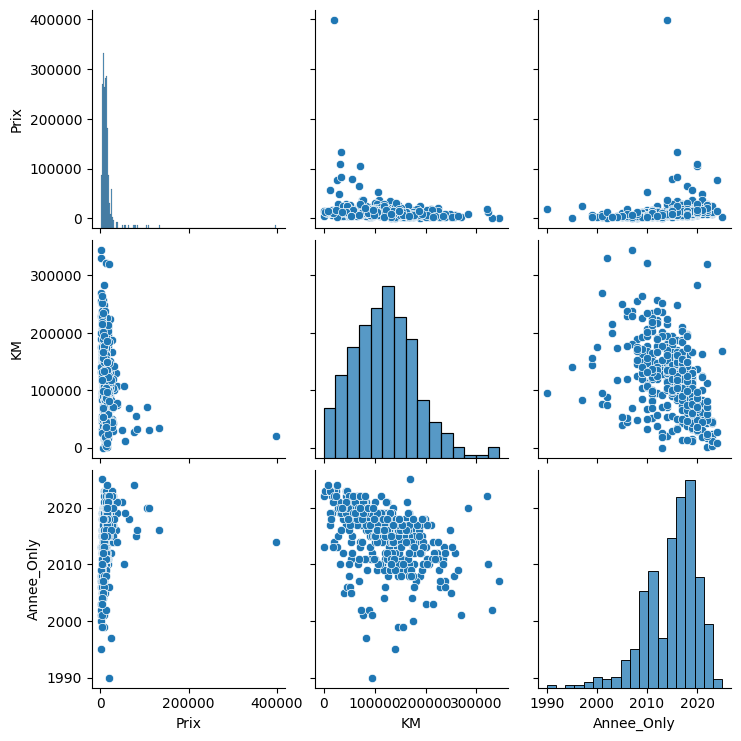

In [6]:
sns.pairplot(df[['Prix', 'KM', 'Annee_Only']].dropna())
plt.show()


# Corrélation

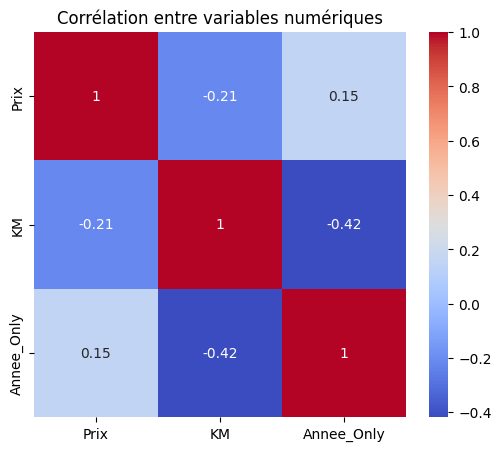

In [7]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Prix', 'KM', 'Annee_Only']].corr(), annot=True, cmap='coolwarm')
plt.title('Corrélation entre variables numériques')
plt.show()


# Top modèle par département

In [8]:
top_models_by_dept = df.groupby(['Département', 'Modèle']).size().reset_index(name='Nombre')
top_per_dept = top_models_by_dept.sort_values(['Département','Nombre'], ascending=[True, False]).groupby('Département').head(1)
top_per_dept.head(10)


,Département,Modèle,Nombre
0,3,kadjar,1
1,4,500,1
18,6,q3,3
20,8,2008,1
22,10,308,1
24,12,note,1
26,13,208,2
41,14,3008,1
43,15,duster,1
44,17,a 250,1


# Modèle le plus fréquent

In [9]:
df['Modèle'].value_counts().head(10)


Modèle
3008       13
polo       12
208        11
clio       11
tiguan     10
2008       10
golf        9
5008        7
sandero     7
308         7
Name: count, dtype: int64

# Prix moyen par modèle

In [10]:
df.groupby('Modèle')['Prix'].mean().sort_values(ascending=False).head(10)


Modèle
12 cilindri       595000.0
458               399000.0
570s              132900.0
m8                109900.0
rs6               105900.0
continental gt     82900.0
cayman             79900.0
m3                 59450.0
mustang            56900.0
a 35 amg           49980.0
Name: Prix, dtype: float64

# Clustering automatique par marque

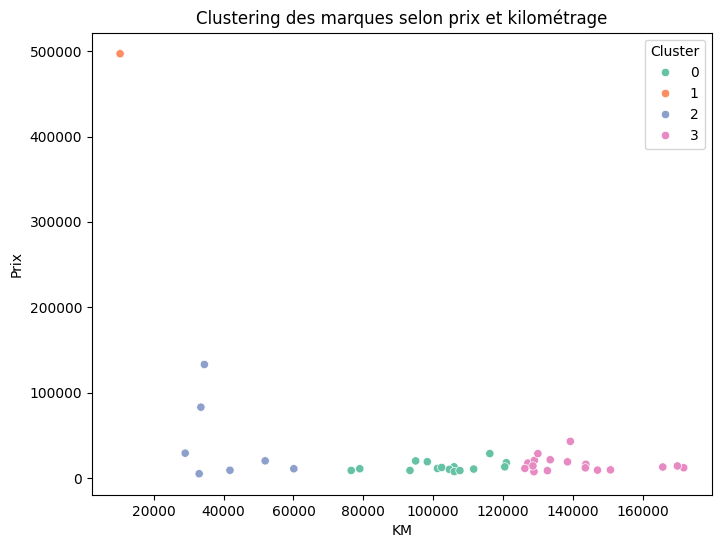

,Prix,KM,Cluster
Marque,,,
Aixam,4900.000000,33000.000000,2
Alfa romeo,11900.000000,171766.000000,3
Audi,21303.708333,133542.500000,3
Bentley,82900.000000,33500.000000,2
Bmw,28497.875000,116233.375000,0
Chevrolet,11117.250000,101250.000000,0
Chrysler,12990.000000,106000.000000,0
Citroen,7285.482759,128881.137931,3
Dacia,8736.600000,76543.533333,0


In [14]:
df_marque = df.groupby('Marque')[['Prix', 'KM']].mean().dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_marque)

kmeans = KMeans(n_clusters=4, random_state=42)
df_marque['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_marque, x='KM', y='Prix', hue='Cluster', palette='Set2')
plt.title('Clustering des marques selon prix et kilométrage')
plt.show()

df_marque.head(50)
